In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysindy as ps

Define a function $y^2x - sin(z)$

In [25]:
x = np.linspace(-1, 1, 10)
y = np.linspace(-2, 2, 20)
z = np.linspace(-3, 3, 30)
lenx = len(x)
leny = len(y)
lenz = len(z)
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

X3D, Y3D, Z3D = np.meshgrid(x, y, z, indexing="ij")
XYZ = np.transpose([X3D, Y3D, Z3D], [1, 2, 3, 0])
XYZ.shape

(10, 20, 30, 3)

plot $x-y$ and $x-z$ sections

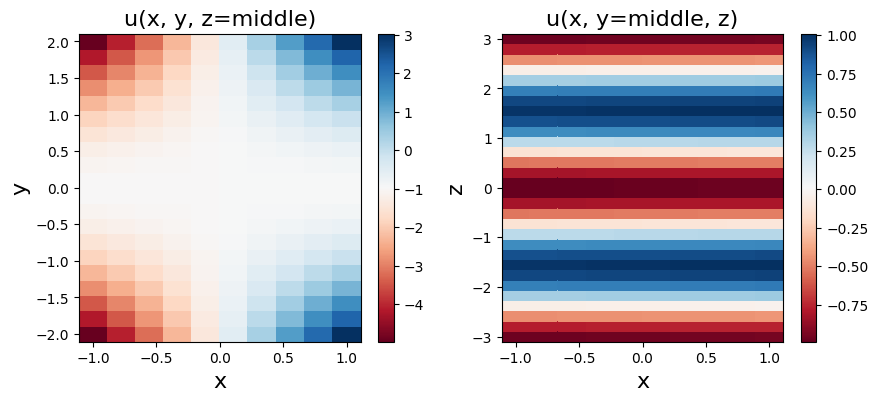

U.shape = (10, 20, 30)


In [31]:
U = (X3D)*(Y3D)**2 - np.cos(2*Z3D)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolor(X3D[:, :, lenz//2], Y3D[:, :, lenz//2], U[:, :, lenz//2], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("u(x, y, z=middle)", fontsize=16)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolor(X3D[:, leny//2, :], Z3D[:, leny//2, :], U[:, leny//2, :], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("u(x, y=middle, z)", fontsize=16)
plt.colorbar()
plt.show()

print(f"{U.shape = }")

As expected, when `x` is varied this leads to a change in sign and when `y` is varied it does not. Concurrently, when `z` is varied we see the ripples.

We now take derivatives:
$$
\frac{\partial u}{\partial x} = 2y^2
$$
and 
$$
\frac{\partial u}{\partial z} = 2 \sin(2z)
$$

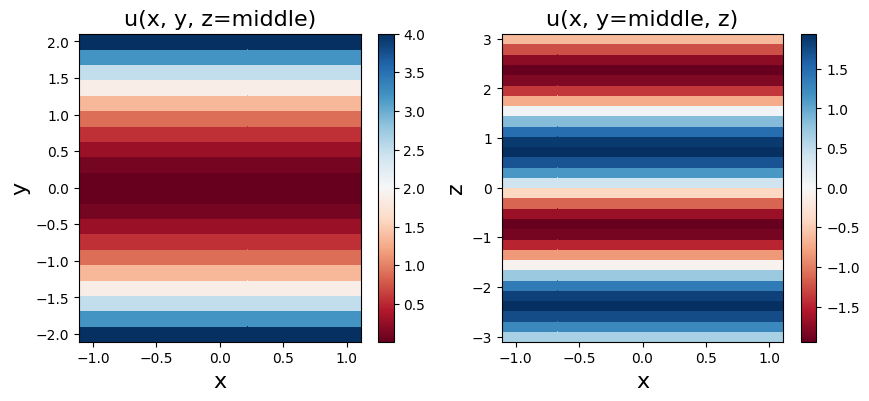

In [34]:
dudx = ps.FiniteDifference(axis=0)._differentiate(U, t=dx)
dudz = ps.FiniteDifference(axis=2)._differentiate(U, t=dz)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolor(X3D[:, :, lenz//2], Y3D[:, :, lenz//2], dudx[:, :, lenz//2], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("u(x, y, z=middle)", fontsize=16)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolor(X3D[:, leny//2, :], Z3D[:, leny//2, :], dudz[:, leny//2, :], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("u(x, y=middle, z)", fontsize=16)
plt.colorbar()
plt.show()

## Adding noise

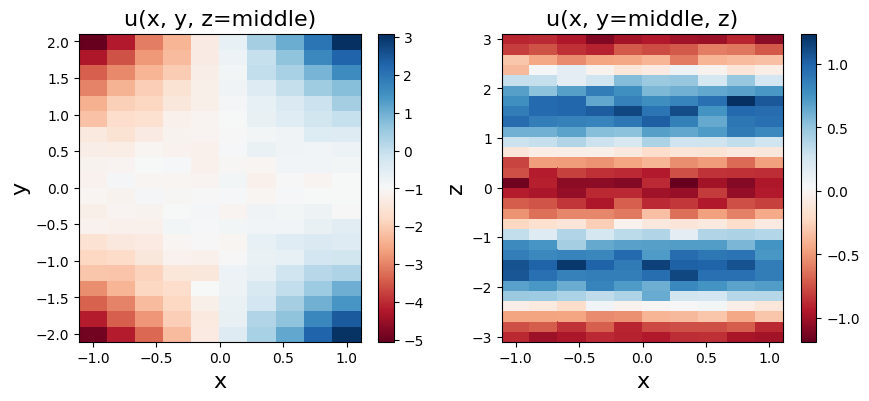

In [36]:
# Generate random noise
noise = np.random.normal(0, 0.1, U.shape)

# Add noise to U
U_with_noise = U + noise
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolor(X3D[:, :, lenz//2], Y3D[:, :, lenz//2], U_with_noise[:, :, lenz//2], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("u(x, y, z=middle)", fontsize=16)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolor(X3D[:, leny//2, :], Z3D[:, leny//2, :], U_with_noise[:, leny//2, :], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("u(x, y=middle, z)", fontsize=16)
plt.colorbar()
plt.show()

Taking finite differences with respect to the noisy input

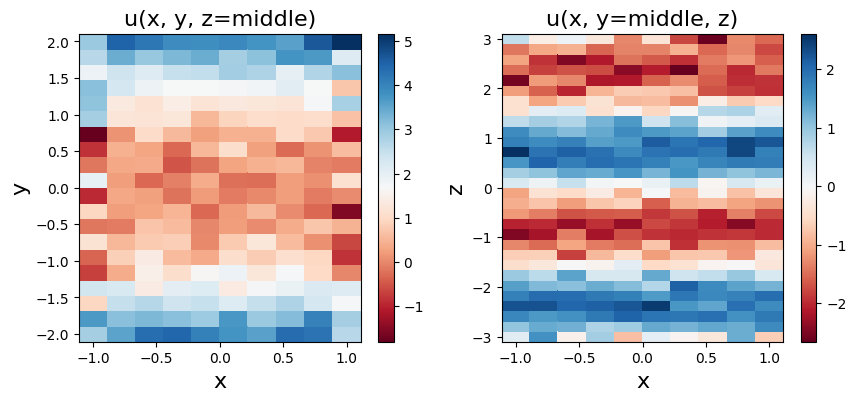

In [37]:
dundx = ps.FiniteDifference(axis=0)._differentiate(U_with_noise, t=dx)
dundz = ps.FiniteDifference(axis=2)._differentiate(U_with_noise, t=dz)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolor(X3D[:, :, lenz//2], Y3D[:, :, lenz//2], dundx[:, :, lenz//2], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("u(x, y, z=middle)", fontsize=16)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolor(X3D[:, leny//2, :], Z3D[:, leny//2, :], dundz[:, leny//2, :], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("u(x, y=middle, z)", fontsize=16)
plt.colorbar()
plt.show()

Now try smoothing:

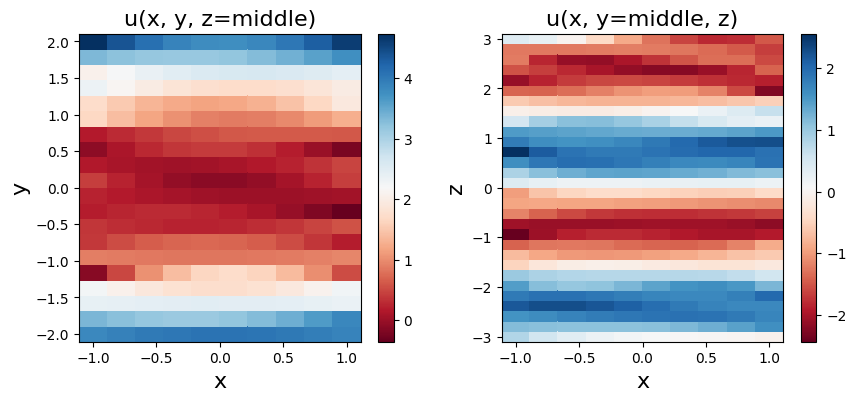

In [40]:
dundx = ps.SmoothedFiniteDifference(axis=0,smoother_kws={'window_length': 10})._differentiate(U_with_noise, t=dx)
dundz = ps.SmoothedFiniteDifference(axis=2,smoother_kws={'window_length': 10})._differentiate(U_with_noise, t=dz)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolor(X3D[:, :, lenz//2], Y3D[:, :, lenz//2], dundx[:, :, lenz//2], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title("u(x, y, z=middle)", fontsize=16)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolor(X3D[:, leny//2, :], Z3D[:, leny//2, :], dundz[:, leny//2, :], cmap="RdBu")
plt.xlabel("x", fontsize=16)
plt.ylabel("z", fontsize=16)
plt.title("u(x, y=middle, z)", fontsize=16)
plt.colorbar()
plt.show()